# [GW] Bilby를 활용한 중력파 모수추정 방법

## 유의사항 ##

* 총점 : 100점
* 사용언어 : python
* 풀이방법 : 문제에서 제시한 출력을 위한 프로그램을 작성하여 소스코드 와 출력파일을 제출한다. 
* 코드 작성시 유의사항 :
 * 코드작성 셀에서만 코드를 작성하고 [사용패키지] 및 [출력코드]는 수정하지 않는다.
 * 추가 사용할 패키지는 코드작설 셀에 작성한다.
 * 문제 풀이를 위한 중력파 신호 데이터는 다음과 같다.
   * GWQ1 ~ GWQ4 : strain data file = [GWNR_Prob2A_H1.gwf], channel name = [H1:GWNR2023]
   * GWQ5 : strain data file = [GWNR_Prob2B_H1.gwf, GWNR_Prob2B_L1.gwf], channel name = [H1:GWNR2023, L1:GWNR2023]
* 코드 제출시 유의사항 :
 * 소스코드 `GWProb_Q_NN.ipynb`를 제출한다.
   * 소스코드를 제출하지 않는 경우 0점 처리한다.
 * 특별히 적시한 내용이 없을시에는 모든 출력파일은 소수점 아래 셋째자리까지 출력한다.
 * 제출 결과는 다음의 파일명을 가진다.
   * GWQ1_A_NN.txt
   * GWQ2_A_NN.txt
   * GWQ3_A_NN.txt
   * GWQ4_A_NN.txt
   * GWQ5_A_NN.txt
   
 * 소스코드 및 결과파일은 다음과 같이 git을 통해 제출한다. 
```shell
$ git add .
$ git commit -m "I have solved all problems"
$ git push
```
* 제공 시스템 :
 * CPU:intel Xeon E5-2650 v3 2.3GHz 4 cores
 * Memory : 4GB
 * 운영체제 : Centos Linux 7.8
 * 채점은 제공된 시스템과 동일한 환경에서 진행된다.
 

In [2]:
# 패키지 버전확인

import gwosc
print("gwosc ver. : ", gwosc.__version__)

import gwpy
print("gwpy ver. : ", gwpy.__version__)

import pycbc
print("pycbc ver. : ", pycbc.__version__)

import bilby
print("bilby ver. : ", bilby.__version__)

gwosc ver. :  0.6.1
gwpy ver. :  3.0.2
pycbc ver. :  2.0.5
bilby ver. :  1.1.5: (CLEAN) 88cf7e2 2022-01-24 22:26:41 +0000


### Q1. 데이터 정보 추출 [10점]

####  주어진 중력파 데이터 (GWNR_Prob2A_H1.gwf)의 시작시간, 종료시간, sampling rate, 데이터의 길이를 출력하는 코드를 작성한다.

* 출력변수의 순서는 시작시간, 종료시간, sampling rate, 데이터의길이 순서이다.
* 출력 변수는 다음과 같다.
 * 시작시간 : start_time
 * 종료시간 : end_time
 * sampling rate : sample_rate
 * 데이터의길이 : duration


* 채점기준 : 시작시간(2.5점), 종료시간(2.5점), sample_rate(2.5점), duration(2.5점)
 * 데이터로 부터 추출한 정보이므로 정확한 값이 일치할 경우 점수가 부여된다.

In [3]:
# GW문제 1번 사용 패키지 (수정금지)

from pycbc import frame

In [4]:
# GW문제 1번 코드 작성 (추가 사용 패키지 작성가능)

obj_pycbc=frame.read_frame('GWNR_Prob2A_H1.gwf','H1:GWNR2023')
start_time = obj_pycbc.start_time
end_time = obj_pycbc.end_time
sample_rate = obj_pycbc.sample_rate
duration = obj_pycbc.duration

In [5]:
# GW 문제 1번 출력 코드 (수정금지)

f= open("GWQ1_A_21.txt","w")
f.write("{:.3f} {:.3f} {:.3f} {:.3f}".format(float(start_time), float(end_time), sample_rate, duration))

f.close()

### Q2. Q-transform 생성 [20점]

#### 주어진 중력파 데이터 (GWNR_Prob2A_H1.gwf)로 부터 Q-transform을 생성하여, Q-transform으로 부터 병합 시간을 확인하여 출력코드에 입력한다. 

* 채점기준 : Q-transform생성(10점), 병합시간(10점)
 * Q-trasform 생성을 통해 chirp sigal을 확인 가능한 경우 10점
 * 병합시간은 Q-trnsform으로부터 읽어와야 하므로 병합시간내에 든 경우 10점 (+-0.5s오차허용)
 * 단, Q-transform을 생성하지 않고 병합시간만 입력할 경우, 병합시간 점수 인정하지 않음.

In [6]:
# GW문제 2번 사용 패키지 (수정금지)

from pycbc import frame ###

import matplotlib.pyplot as plt
%matplotlib inline

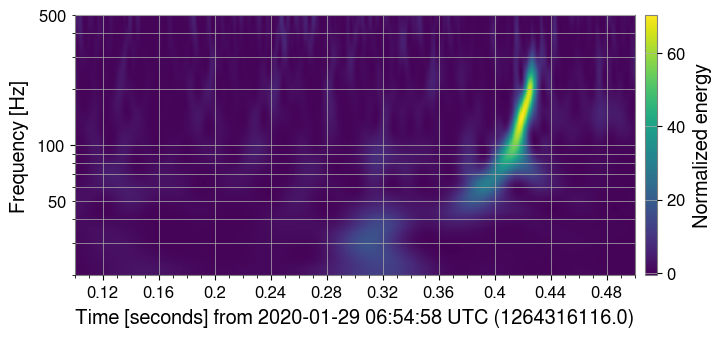

In [7]:
# GW문제 2번 코드 작성 (추가 사용 패키지 작성가능)
from gwpy.timeseries import TimeSeries
data = TimeSeries.read('GWNR_Prob2A_H1.gwf','H1:GWNR2023')
qspecgram=data.q_transform(frange=(20, 1024),outseg=(1264316116.1,1264316116.5)) # Qtransform
plot = qspecgram.plot(figsize=[8,4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show() # 264316116.43

In [8]:
# GW 문제 2번 출력 코드 (수정금지)

f= open("GWQ2_A_21.txt","w")
mergeTime = input("Q-trasform에서 병합시간을 확인하여 입력 하세요 (소수점 둘째짜리까지 입력하세요.) : ")
f.write("{:.2f}" .format(float(mergeTime)))

f.close()

Q-trasform에서 병합시간을 확인하여 입력 하세요 (소수점 둘째짜리까지 입력하세요.) : 264316116.43


### Q3. SNR (Signal to Noise Ratio) 계산 [20점]

#### 주어진 중력파 데이터 (GWNR_Prob2A_H1.gwf)로 부터 PSD (Power Spectrum Density)와 주어진 조건의 template을 이용하여 SNR을 계산하는 코드를 작성하고 SNR값을 출력한다. SNR이 값이 높게 나올때의 정확한 신호의 시간도 함께 출력한다.

* Template Waveform : 파형 = IMRPhenomPv2, mass1 = 35, mass2 = 30
* 데이터의 출력순서는 SNR, 이벤트시간 순서이다.
* 출력변수는 다음과 같다.
 * SNR : snr_peak
 * 이벤트시간 : time
* Hint : Waveform 생성, PSD 계산 후 matched filetering을 통하여 SNR값을 계산한다.
* 채점기준 : template 파형생성(2.5점), PSD계산(2.5점), 이벤트시간(5점), SNR계산(10점)
 * 이벤트시간과 SNR 값의 오차가 0.05이내이면 점수가 주어진다.
 * 단, template파형과 PSD가 출력되지 않으면, 이벤트시간과 SNR값의 점수를 인정하지 않음.

In [9]:
# GW문제 3번 사용 패키지 (수정금지)

from pycbc import waveform

from pycbc import frame ###
import matplotlib.pyplot as plt ###
%matplotlib inline

from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
import numpy as np

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


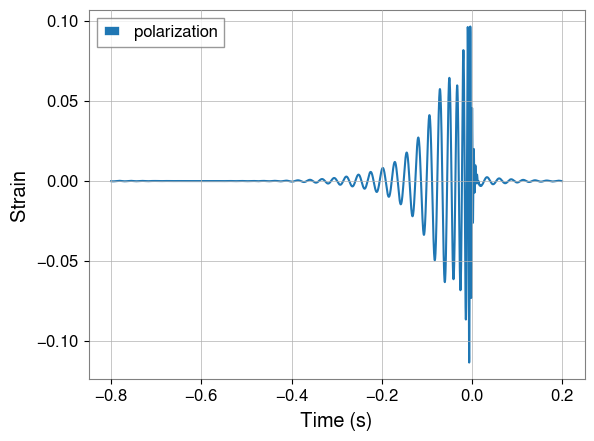

In [16]:
# GW문제 3번 코드 작성 (추가 사용 패키지 작성가능)
sample_rate = int(sample_rate)
data_length = int(duration)

# 화이트 노이즈
data = np.random.normal(size=[sample_rate * data_length])
times = np.arange(len(data)) / float(sample_rate)

from pycbc.waveform import get_td_waveform #waveform 생성
apx = 'IMRPhenomPv2'
hp, hx = get_td_waveform(approximant=apx, mass1=35, mass2=30, 
                         delta_t=1.0/sample_rate, f_lower=40)

hp = hp / max(np.correlate(hp, hp, mode='full'))**0.5
plt.plot(hp.sample_times, hp, label='polarization')
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

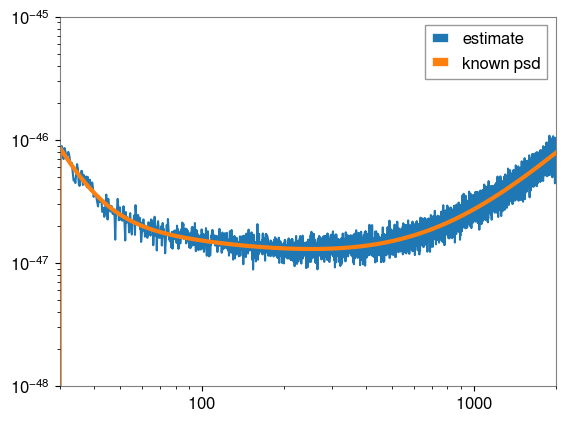

In [14]:
import pycbc.noise, pycbc.psd

flow = 30.0
delta_f = obj_pycbc.delta_f
flen = int(sample_rate / (2*delta_f)) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow) # 우리 psd

delta_t = 1.0 / sample_rate
ts = pycbc.noise.noise_from_psd(data_length*sample_rate, delta_t, psd, seed=127)

seg_len = int(4 / delta_t)
seg_stride = int(seg_len / 2)
estimated_psd = pycbc.psd.welch(ts, seg_len=seg_len, seg_stride=seg_stride)

# plot
plt.loglog(estimated_psd.sample_frequencies, estimated_psd, label='estimate')
plt.loglog(psd.sample_frequencies, psd, linewidth=3, label='known psd')
plt.xlim(xmin=flow, xmax=2000)
plt.ylim(1e-48, 1e-45)
plt.legend()
plt.grid()
plt.show()

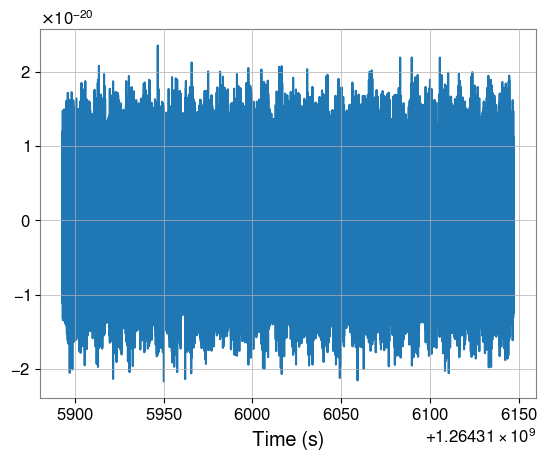

In [39]:
from pycbc import frame
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
obj=frame.read_frame('GWNR_Prob2A_H1.gwf','H1:GWNR2023')
strain=highpass(obj,20)
strain=resample_to_delta_t(strain, 1/obj.sample_rate)
conditioned = strain.crop(1, 1)
plt.plot(conditioned.sample_times, conditioned)
plt.xlabel('Time (s)')
plt.show()

In [40]:
# psd 계산
from pycbc.psd import interpolate, inverse_spectrum_truncation
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
 low_frequency_cutoff=20)

Text(0, 0.5, 'Strain')

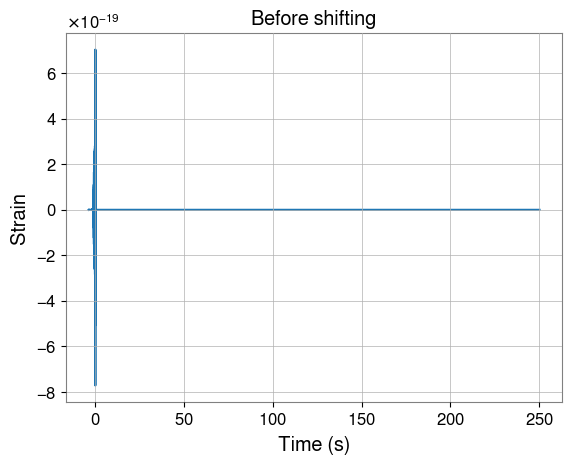

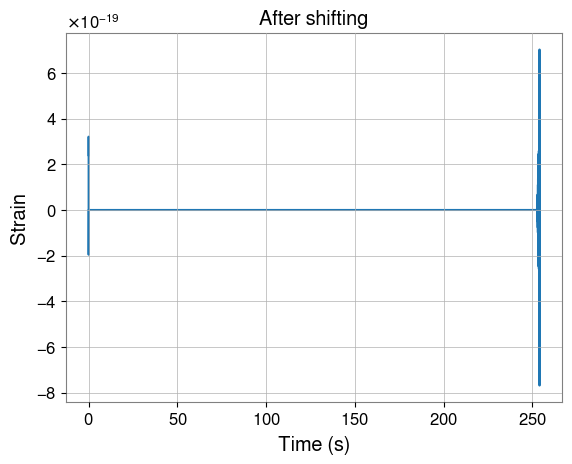

In [41]:
# waveform 생성
from pycbc.waveform import get_td_waveform

hp, hc = get_td_waveform(approximant="IMRPhenomPv2", mass1=35, mass2=30, 
                         delta_t=conditioned.delta_t, f_lower=20)

# size 맞춰주기
hp.resize(len(conditioned))

# hp plot
plt.figure()
plt.title('Before shifting')
plt.plot(hp.sample_times, hp)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
template = hp.cyclic_time_shift(hp.start_time)
plt.figure()
plt.title('After shifting')
plt.plot(template.sample_times, template)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

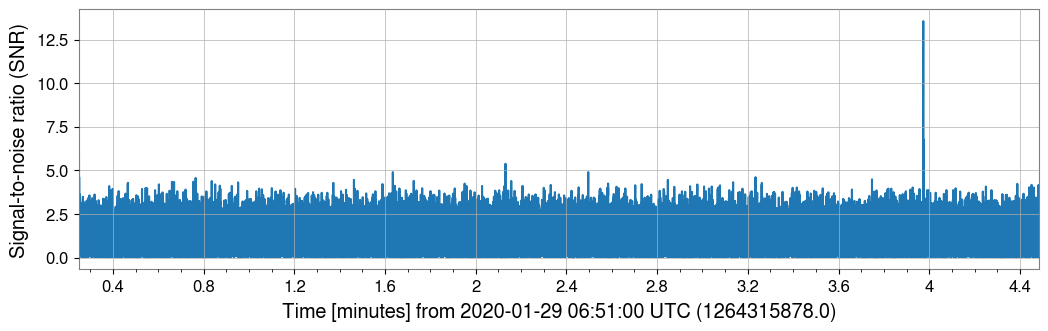

In [42]:
snr = matched_filter(template, conditioned, psd=psd, low_frequency_cutoff=20)
snrts = TimeSeries.from_pycbc(snr).abs() 
plot = snrts.plot()
ax = plot.gca()
ax.set_ylabel('Signal-to-noise ratio (SNR)') 
plot.show()

In [48]:
peak = abs(snr).numpy().argmax()
snr_peak = abs(snr[peak])
time = snr.sample_times[peak]
print("time:{} \nsnr_peak:{}".format(time,snr_peak))

time:1264316116.4296875 
snr_peak:13.557737362462097


In [50]:
# GW문제 3번 출력 코드 (수정금지)

f= open("GWQ3_A_21.txt","w")
f.write("{:.3f} {:.3f}" .format(snr_peak, time))

f.close()

### Q4. Bilby를 활용한 중력파 모수추정1 [20점]

#### 주어진 중력파 데이터 (GWNR_Prob2A_H1.gwf)로부터 Bilby를 활용한 중력파 모수추정을 수행하여 여러매개 변수중 chirp mass, luminosity distance의 posterior의 Median 값을 출력하는 코드를 작성하고, Chirpmass와 distance의 median값을 순서대로 출력한다. 또한 Bilby의 결과를 통해 얻은 Bayes factor를 입력한다.

* Prior는 bilby.gw.prior.BBHPriorDict()를 사용한다.
* 데이터의 출력순서는 chirp mass의 median value, luminoisty distance의 median value, Bayes facotor 순서이다.
* 채점기준 : chirp mass(10점), luminosity distance(10점)
 * 출제자가 선정한 기준값에서 10%이내 (8점, 그 중 Bayes factor가 큰 순서대로 +2,+1씩 차등 점수를 부여한다. 
   * 즉, 10점(1팀),9점(1팀),8점(그 외)
 * 출제자가 선정한 기준값에서 20%이내 (5점, 그 중 Bayes factor가 큰 순서대로 +2,+1씩 차등 점수를 부여한다.
   * 즉, 7점(1팀),6점(1팀),5점(그 외)
 * 출제자가 선정한 기준값에서 30%이내 (2점, 그 중 Bayes factor가 큰 순서대로 +2,+1씩 차등 점수를 부여한다.
   * 즉, 4점(1팀),3점(1팀),2점(그 외) 


In [2]:
# GW문제 4번 사용 패키지 (수정금지)

from gwpy import timeseries
from gwpy.timeseries import TimeSeries

import bilby
from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters

import numpy as np

In [3]:
# GW문제 4번 코드 작성 (추가 사용 패키지 작성가능)

from bilby.core.prior import Uniform
from gwpy.timeseries import TimeSeries
from pycbc import frame
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import matplotlib.pyplot as plt

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


17:22 bilby INFO    : Generating frequency domain strain from given time domain strain.
17:22 bilby INFO    : Applying a tukey window with alpha=0.1, roll off=0.2


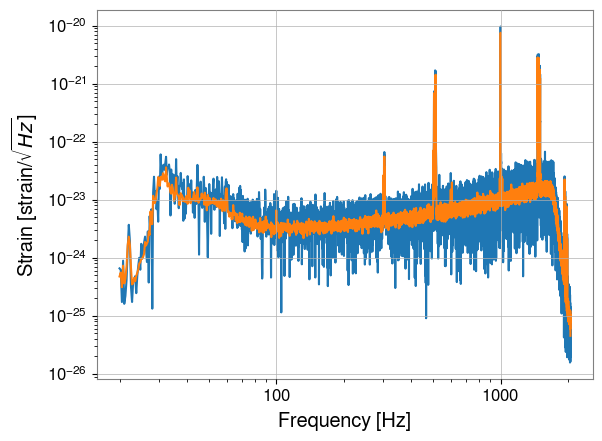

In [4]:
# PowerSpectralDensity (2: psd fixed)

post_trigger_duration = 2
duration = 4
analysis_start = 1264316116 + post_trigger_duration - duration

H1_analysis_data = TimeSeries.read("GWNR_Prob2A_H1.gwf", "H1:GWNR2023")
high = H1_analysis_data.highpass(30)
zoom = high.crop(analysis_start, analysis_start + duration)

H1 = bilby.gw.detector.get_empty_interferometer("H1")
H1.set_strain_data_from_gwpy_timeseries(zoom)

# H1_psd_data
psd_duration = duration * 32
psd_start_time = analysis_start - psd_duration
H1_psd_data = TimeSeries.read("GWNR_Prob2A_H1.gwf", "H1:GWNR2023")

high_psd_data = H1_psd_data.highpass(30)
zoom_psd_data = high_psd_data.crop(psd_start_time, psd_start_time + psd_duration)

psd_alpha = 2 * H1.strain_data.roll_off / duration

H1_psd = zoom_psd_data.psd(fftlength = duration, overlap = 0, window = ("tukey", psd_alpha), method = "median")
H1.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(frequency_array = H1_psd.frequencies.value, 
                                                                   psd_array = H1_psd.value)

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask 

ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]))

ax.loglog(H1.power_spectral_density.frequency_array[idxs],
          H1.power_spectral_density.asd_array[idxs])

ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.show()

In [6]:
# Liklihood

interferometers = [H1]

waveform_arguments = dict(
waveform_approximant='IMRPhenomPv2',
    reference_frequency=100.,
    catch_waveform_errors=True)

waveform_generator = bilby.gw.WaveformGenerator(
    frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
    waveform_arguments=waveform_arguments,
    parameter_conversion=convert_to_lal_binary_black_hole_parameters)

prior = bilby.gw.prior.BBHPriorDict()

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers, 
    waveform_generator, 
    priors = prior,
    time_marginalization = True, 
    phase_marginalization = True,
    distance_marginalization = False)

17:22 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
17:22 bilby INFO    : No prior given, using default BBH priors in /opt/olaf/anaconda3/2020.11/GNU/4.8/envs/igwn-py39/lib/python3.9/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.
17:22 bilby WARNING : Prior not provided for geocent_time, using the BBH default.


In [8]:
# bilby running code (2: short version)

result_short = bilby.run_sampler(likelihood, 
                                 prior, 
                                 sampler='dynesty', 
                                 outdir='./GWProb2_Q4/posteriors_psd_fixed_100_prob', 
                                 label="GWQ2_4",
                                 conversion_function = bilby.gw.conversion.generate_all_bbh_parameters,
                                 # sample="unif", 
                                 nlive=100, 
                                 dlogz=3)

17:23 bilby INFO    : Running for label 'GWQ2_4', output will be saved to './GWProb2_Q4/posteriors_psd_fixed_100_prob'
17:23 bilby INFO    : Using lal version 7.2.4
17:23 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.2.4;Id: e5e51f77cbaf264a20a620b4acefbe7ac38c84c6;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
17:23 bilby INFO    : Using lalsimulation version 4.0.2
17:23 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v4.0.2;Id: 233cc3963d87688c272b7affe7dd0b962e4c11a0;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
17:23 bilby INFO    : Search parameters:
17:23 bilby INFO    :   mass_ratio = Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
17:23 bilby INFO    :   chirp_mass = Uniform(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
17:2

0it [00:00, ?it/s]

17:23 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 100, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 60, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x2b7ab99bd550>>, 'dlogz': 3, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
17:23 bilby INFO    : Checkpoint every check_point_delta_t = 600s
17:23 bilby INFO    : Using dynesty version 1.0.1
17:23 bilby INFO    : Using the bilby-

17:41 bilby INFO    : Reconstructing marginalised parameters.


  0%|          | 0/1690 [00:00<?, ?it/s]

17:48 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/1690 [00:00<?, ?it/s]

17:48 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/1690 [00:00<?, ?it/s]

17:48 bilby INFO    : Summary of results:
nsamples: 1690
ln_noise_evidence: -8477.022
ln_evidence: -8458.682 +/-  0.784
ln_bayes_factor: 18.340 +/-  0.784



In [9]:
print(result_short)

nsamples: 1690
ln_noise_evidence: -8477.022
ln_evidence: -8458.682 +/-  0.784
ln_bayes_factor: 18.340 +/-  0.784



In [14]:
result_short.posterior.chirp_mass.median
mc_median = 38.909164

In [16]:
result_short.posterior.luminosity_distance.median
distance_median = 4207.741871

In [19]:
bayes_factor = result_short.log_bayes_factor
bayes_factor = 18.339830192792316

In [21]:
# GW문제 4번 출력 코드 (수정금지)

f= open("GWQ4_A_21.txt","w")
mc_median = float(input("chirpmass의 median값을 입력하세요 : "))
distance_median = float(input("distance의 median값을 입력하세요 : "))
bayes_factor = float(input("Bilby결과에서 bayes_factor 입력하세요 : "))

f.write("{:.3f} {:.3f} {:.3f}" .format(mc_median, distance_median,bayes_factor))

f.close()

chirpmass의 median값을 입력하세요 : 38.909164
distance의 median값을 입력하세요 : 4207.741871
Bilby결과에서 bayes_factor 입력하세요 : 18.339830192792316


### Q5. Bilby를 활용한 중력파 모수추정2 [30점]

#### 주어진 중력파 데이터 (GWNR_Prob2B_H1.gwf, GWNR_Prob2B_L1.gwf)로부터 SNR을 구하고, Bilby를 활용한 중력파 모수추정을 수행하여 여러매개 변수중 chirp mass, luminosity distance의 posterior의 Median 값을 출력하는 코드를 작성하고, Chirpmass와 distance의 median값을 순서대로 출력한다. 또한 Bilby의 결과를 통해 얻은 Bayes factor를 입력한다.

* Template Waveform : 파형 = IMRPhenomPv2, mass1 = 10, mass2 = 10
* Bilby 모수추정시 주어진 중력파 데이터(H1, L1) 검출기 2개를 모두 사용해야 한다.(1개의 검출기 데이터만을 사용할 경우 -10점 감점)
* prior는 bilby.core.prior.PriorDict()를 사용한다.
* 데이터의 출력순서는 SNR, chirp mass의 median value, luminoisty distance의 median value, Bayes facotor 순서이다.
* 채점기준 : SNR (10점), chirp mass(10점), luminosity distance(10점)
 * SNR 값의 오차가 0.05이내이면 점수가 주어진다.
 * 출제자가 선정한 기준값에서 10%이내 (8점, 그 중 Bayes factor가 큰 순서대로 +2,+1씩 차등 점수를 부여한다. 
   * 즉, 10점(1팀),9점(1팀),8점(그 외)
 * 출제자가 선정한 기준값에서 20%이내 (5점, 그 중 Bayes factor가 큰 순서대로 +2,+1씩 차등 점수를 부여한다.
   * 즉, 7점(1팀),6점(1팀),5점(그 외)
 * 출제자가 선정한 기준값에서 30%이내 (2점, 그 중 Bayes factor가 큰 순서대로 ,+2,+1씩 차등 점수를 부여한다.
   * 즉, 4점(1팀),3점(1팀),2점(그 외)  


In [1]:
# GW문제 5번 패키지 및 코드 작성

from pycbc import waveform
from pycbc import frame ###
import matplotlib.pyplot as plt ###
%matplotlib inline
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.filter import matched_filter
from pycbc.waveform import get_td_waveform #waveform 생성
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
import numpy as np
from gwpy.timeseries import TimeSeries

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [9]:
Hdata=frame.read_frame('GWNR_Prob2B_H1.gwf', 'H1:GWNR2023')
Ldata=frame.read_frame('GWNR_Prob2B_L1.gwf', 'L1:GWNR2023')

obj=[Hdata, Ldata]
name=['H1','L1']
snrs=np.zeros(2)

for i in range(2):
    strain=highpass(obj[i],20)
    strain=resample_to_delta_t(strain, 1/obj[i].sample_rate)
    conditioned = strain.crop(2,2)

    # psd 계산
    psd = conditioned.psd(4)
    psd = interpolate(psd, conditioned.delta_f)
    psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
     low_frequency_cutoff=20)
    
    # waveform 생성
    hp, hc = get_td_waveform(approximant="IMRPhenomPv2", mass1=10, mass2=10, 
                             delta_t=conditioned.delta_t, f_lower=20)

    # size 맞춰주기
    hp.resize(len(conditioned))
    template = hp.cyclic_time_shift(hp.start_time)
    snr = matched_filter(template, conditioned, psd=psd, low_frequency_cutoff=20)
    snr = snr.crop(8,4)
    snrts = TimeSeries.from_pycbc(snr).abs() 
    
    # peak, time
    peak = abs(snr).numpy().argmax()
    snr_peak = abs(snr[peak])
    time = snr.sample_times[peak]
    print(name[i]+"\ntime:{} \nsnr_peak:{}".format(time,snr_peak))
    snrs[i]=snr_peak

H1
time:2483.96923828125 
snr_peak:28.913951891285183
L1
time:2483.96923828125 
snr_peak:33.557214464150185


In [10]:
snr = np.sqrt(snrs[0]**2 + snrs[1]**2)
print(snr)

44.295634734864386


In [11]:
f= open("GWQ5_A_21.txt","w")
snr=float(input("SNR값을 입력하세요 : "))
mc_median = float(input("chirpmass의 median값을 입력하세요 : "))
distance_median = float(input("distance의 median값을 입력하세요 : "))
bayes_factor = float(input("Bilby결과에서 bayes_factor 입력하세요 : "))

f.write("{:.3f} {:.3f} {:.3f} {:.3f}" .format(snr,mc_median, distance_median,bayes_factor))

f.close()

SNR값을 입력하세요 : 44.29563
chirpmass의 median값을 입력하세요 : 0
distance의 median값을 입력하세요 : 0
Bilby결과에서 bayes_factor 입력하세요 : 0
